
# Temperature prediction using Delhi weather dataset in Linear regression model.


In [16]:
#Lib Import 

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
import sklearn
%matplotlib inline


In [4]:
# Data set reading process
                
data=pd.read_csv('Delhi.csv')

print(data.columns)

data['datetime_utc']=pd.to_datetime(data['datetime_utc'])

Index(['datetime_utc', ' _conds', ' _dewptm', ' _fog', ' _hail',
       ' _heatindexm', ' _hum', ' _precipm', ' _pressurem', ' _rain', ' _snow',
       ' _tempm', ' _thunder', ' _tornado', ' _vism', ' _wdird', ' _wdire',
       ' _wgustm', ' _windchillm', ' _wspdm'],
      dtype='object')


In [5]:
#data.set_index('datetime_utc',inplace=True)

data.drop('datetime_utc', axis = 1, inplace=True)
columns_name=list(data.columns)
#columns_name[0].replace("_","").strip()
new_columns=list(i.replace("_","").strip() for i in columns_name)

data.columns=new_columns



In [6]:
data.columns

Index(['conds', 'dewptm', 'fog', 'hail', 'heatindexm', 'hum', 'precipm',
       'pressurem', 'rain', 'snow', 'tempm', 'thunder', 'tornado', 'vism',
       'wdird', 'wdire', 'wgustm', 'windchillm', 'wspdm'],
      dtype='object')

In [7]:
new_columns


['conds',
 'dewptm',
 'fog',
 'hail',
 'heatindexm',
 'hum',
 'precipm',
 'pressurem',
 'rain',
 'snow',
 'tempm',
 'thunder',
 'tornado',
 'vism',
 'wdird',
 'wdire',
 'wgustm',
 'windchillm',
 'wspdm']

In [8]:
# Analyse the dataset
                

data.head()




,conds,dewptm,fog,hail,heatindexm,hum,precipm,pressurem,rain,snow,tempm,thunder,tornado,vism,wdird,wdire,wgustm,windchillm,wspdm
0,Fog,9.0,1,0,NaN,100.0,NaN,-9999,0,0,9.0,0,0,0.4,0.0,North,NaN,NaN,0.0
1,Fog,9.0,1,0,NaN,100.0,NaN,1017,0,0,9.0,0,0,0.3,0.0,North,NaN,NaN,0.0
2,Patches of Fog,9.0,1,0,NaN,100.0,NaN,1018,0,0,9.0,0,0,0.5,NaN,NaN,NaN,NaN,0.0
3,Fog,10.0,1,0,NaN,100.0,NaN,1018,0,0,10.0,0,0,0.3,0.0,North,NaN,NaN,0.0
4,Fog,13.0,1,0,NaN,100.0,NaN,1018,0,0,13.0,0,0,0.4,0.0,North,NaN,NaN,0.0


In [9]:
data.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1418 entries, 0 to 1417
Data columns (total 19 columns):
conds         1416 non-null object
dewptm        1417 non-null float64
fog           1418 non-null int64
hail          1418 non-null int64
heatindexm    42 non-null float64
hum           1417 non-null float64
precipm       0 non-null float64
pressurem     1418 non-null int64
rain          1418 non-null int64
snow          1418 non-null int64
tempm         1417 non-null float64
thunder       1418 non-null int64
tornado       1418 non-null int64
vism          1418 non-null float64
wdird         1156 non-null float64
wdire         1156 non-null object
wgustm        9 non-null float64
windchillm    6 non-null float64
wspdm         1418 non-null float64
dtypes: float64(10), int64(7), object(2)
memory usage: 210.6+ KB


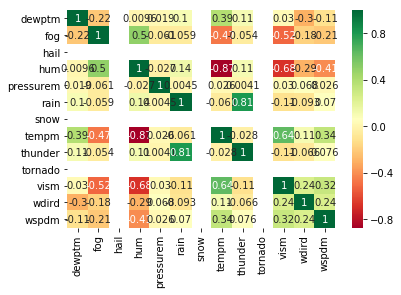

In [17]:
#sns.catplot(x='_conds',y='_tempm',data=data)

sns.heatmap(data.corr(),annot=True,cmap='RdYlGn')



In [12]:
data.isnull().sum()

conds            2
dewptm           1
fog              0
hail             0
heatindexm    1376
hum              1
precipm       1418
pressurem        0
rain             0
snow             0
tempm            1
thunder          0
tornado          0
vism             0
wdird          262
wdire          262
wgustm        1409
windchillm    1412
wspdm            0
dtype: int64

In [13]:
# Remove Null values from dataset.
              
              

# here heatindexm and precipm and wgustm and windchillm clomns is fully having maxinum null point 
# so we drop this columns fron dataset.

data.drop(['heatindexm','precipm','wgustm','windchillm'],axis=1,inplace=True)



In [14]:
data.describe()



,dewptm,fog,hail,hum,pressurem,rain,snow,tempm,thunder,tornado,vism,wdird,wspdm
count,1417.000000,1418.000000,1418.0,1417.000000,1418.000000,1418.000000,1418.0,1417.000000,1418.000000,1418.0,1418.000000,1156.000000,1418.000000
mean,12.455187,0.134697,0.0,62.119266,1005.996474,0.021862,0.0,20.219478,0.018336,0.0,1.802750,229.186851,7.965867
std,3.460165,0.341520,0.0,26.218563,292.509753,0.146284,0.0,7.560152,0.134209,0.0,0.953495,100.867388,7.758093
min,1.000000,0.000000,0.0,6.000000,-9999.000000,0.000000,0.0,4.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,10.000000,0.000000,0.0,42.000000,1010.000000,0.000000,0.0,15.000000,0.000000,0.0,1.000000,140.000000,3.700000
50%,13.000000,0.000000,0.0,63.000000,1015.000000,0.000000,0.0,19.000000,0.000000,0.0,2.000000,270.000000,7.400000
75%,15.000000,0.000000,0.0,86.000000,1018.000000,0.000000,0.0,25.000000,0.000000,0.0,2.000000,290.000000,11.100000
max,24.000000,1.000000,0.0,100.000000,1025.000000,1.000000,0.0,42.000000,1.000000,0.0,5.000000,360.000000,172.200000


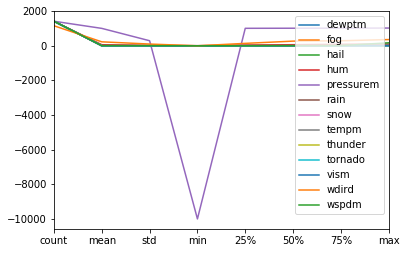

In [18]:
data.describe().plot()

C:\Users\LBITIND\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


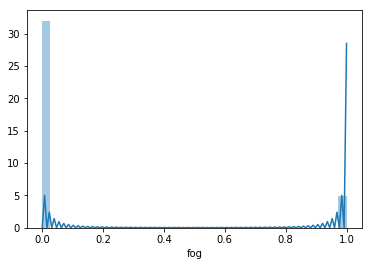

In [19]:
# here tornado,snow, hail columns mean value is zero so we drop that columns.

data.drop(['tornado','snow', 'hail'],axis=1,inplace=True)

sns.distplot(data['fog'])



In [20]:
data.isnull().sum()

conds          2
dewptm         1
fog            0
hum            1
pressurem      0
rain           0
tempm          1
thunder        0
vism           0
wdird        262
wdire        262
wspdm          0
dtype: int64

In [21]:
# so here wdird and wdire is having more null points so we drop both columns

# data = data[np.isfinite(data['wdird'])]

# OR

data.dropna(subset=['wdird', 'wdire'],inplace=True)

data.isnull().sum()  # now most of the null rows are removed 

# so conds coluns is fill uing before day conds data

data['conds'].fillna(method='ffill',inplace=True)  # we fill null with front fill method

print(data.isnull().sum())  # Now fill the all null values.


conds        0
dewptm       0
fog          0
hum          0
pressurem    0
rain         0
tempm        0
thunder      0
vism         0
wdird        0
wdire        0
wspdm        0
dtype: int64


In [22]:
# Feature Selection 


data.dtypes # here find our dataset data type for all columns

# conds and wdire only is categorical data otherwise is numerical data.

# The wind direction and thunder not need to find our temperature prediction so drop that.

data.drop(['wdire','thunder'],axis=1,inplace=True) 

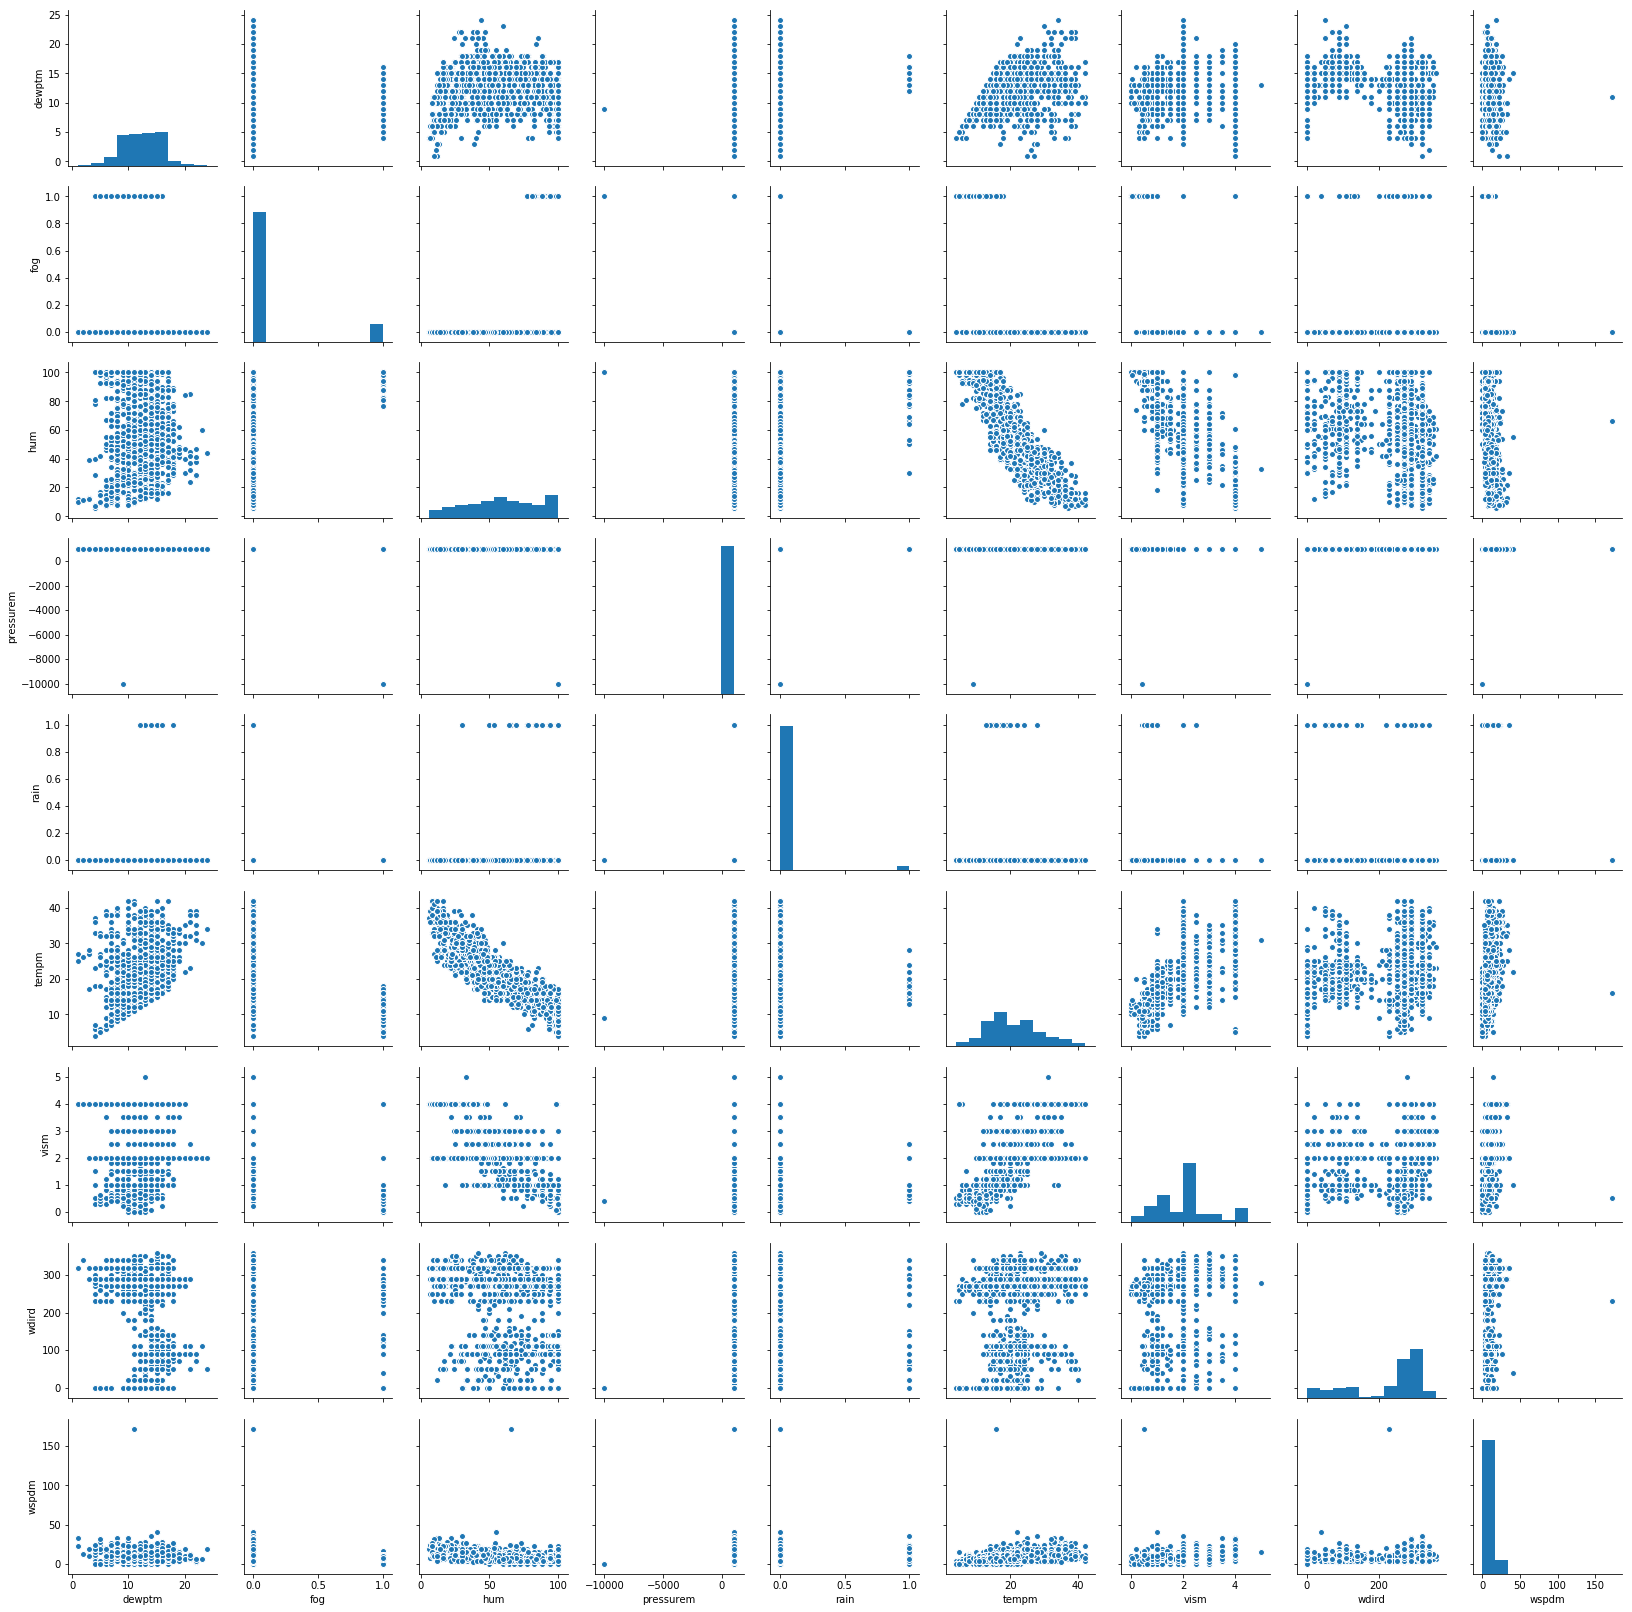

In [30]:
#   Data visualization

sns.pairplot(data)

C:\Users\LBITIND\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


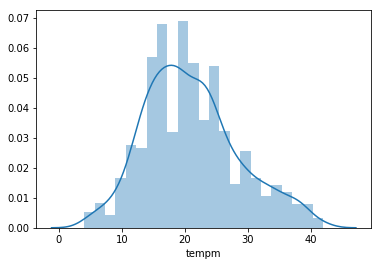

In [29]:
sns.distplot(data['tempm'])


C:\Users\LBITIND\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


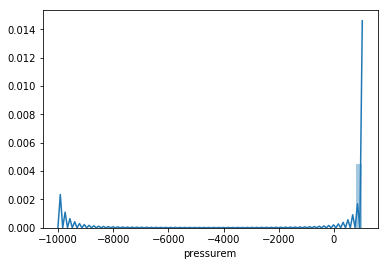

In [31]:
sns.distplot(data['pressurem'])

C:\Users\LBITIND\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


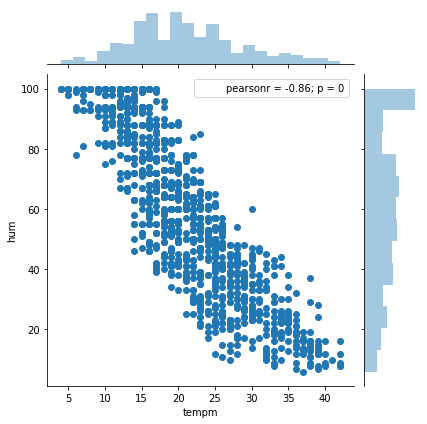

In [32]:
sns.jointplot(x='tempm',y='hum',data=data)

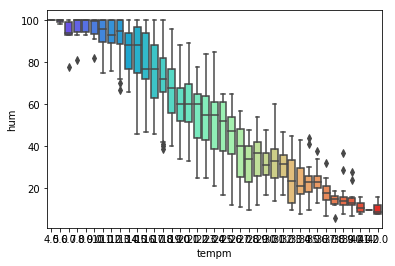

In [33]:
# this plot is represent the low humidity  is get high temperature .
# it is linearly increase .This is the main factor of our project

sns.boxplot(x='tempm',y='hum',data=data,palette='rainbow')


In [34]:
# the box plot show exactly

# Data pre processing 
     
# In our dataset is having only one categorical data otherwise is numerical.
# so categorical data in convert to numerical data 
     
data['conds'].unique() # got more unique result 

data['conds'].nunique() # number of unique # totally 23 unique data 

print(data['conds'].value_counts())

Haze                            519
Smoke                           209
Mist                            144
Fog                             103
Widespread Dust                  24
Patches of Fog                   24
Partly Cloudy                    21
Blowing Sand                     20
Mostly Cloudy                    17
Thunderstorms and Rain           14
Scattered Clouds                 12
Overcast                         12
Partial Fog                       8
Light Thunderstorms and Rain      6
Light Rain                        5
Light Fog                         5
Light Drizzle                     4
Heavy Thunderstorms and Rain      2
Heavy Fog                         2
Thunderstorm                      2
Light Thunderstorm                1
Unknown                           1
Drizzle                           1
Name: conds, dtype: int64


In [35]:
# categorical value convert into numeric is having 3 methods.

# method 1 is manual chaning processing.

# method 2 is lable encoding 

## without sklearn
data["conds"] = data["conds"].astype('category')
#
## Then you can assign the encoded variable to a new column using the cat.codes
#
data["conds"]= data["conds"].cat.codes

# split features and lables  


data.describe()

X=data.drop(['tempm'],axis=1)

Y=data['tempm']


In [36]:
# split training and testing data


x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [37]:
# Build LinearRegression model

li_model=LinearRegression()


# Fit to model using training data


li_model.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [38]:
# predict the model using test data

prediction=li_model.predict(x_test)


In [39]:
# Validate the model using testing data


accuary=li_model.score(x_test,y_test)

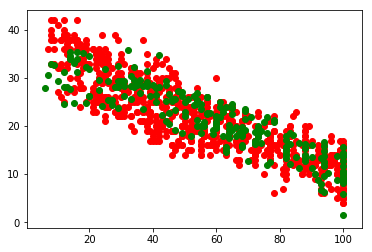

In [40]:
# Plot the results


plt.scatter(x=x_train['hum'],y=y_train[:],color='r')
#plt.plot(x=x_test['hum'],y=prediction[:],color='g')
plt.scatter(x=x_test['hum'],y=prediction[:],color='g')
plt.show()

C:\Users\LBITIND\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


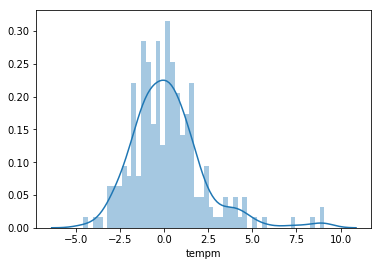

In [41]:
sns.distplot((y_test-prediction),bins=50)

In [42]:
# Find the Error value 

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

Mean Absolute Error: 1.4808993789375355
Mean Squared Error: 4.255214438065869
Root Mean Squared Error: 2.062817112122611


In [43]:
li_model.score(x_train,y_train)


0.9333659124405737

In [50]:
r2_res=r2_score(y_test,prediction)

## Thanks for reading

# calculate r2 and ad_r2

ss_residual=sum((y_test-prediction)**2)
ss_total=sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(ss_residual))/ss_total

adjusted_r_squared=1-(1-r_squared)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

print ('R_squared_Value = {}  Adjusted_R_squared_value = {}'.format(r_squared,adjusted_r_squared))



R_squared_Value = 0.9222257441189629  Adjusted_R_squared_value = 0.9190727337454073


In [ ]:
# Our Linear Regression MOdel is get good score for Adjusted R squares value 
# becouse we are build LR Model using multiple independent variable fetaures.


# Thanks for reading